In [150]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_row", 200)
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats
from sklearn.metrics import (f1_score, accuracy_score, recall_score, precision_score, confusion_matrix, make_scorer)
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [151]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [152]:
path = "/content/drive/MyDrive/Project 4 - ML 1/INNHotelsGroup.csv"
da = pd.read_csv(path)

In [153]:
da.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [154]:
da.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [155]:
da.shape

(36275, 19)

In [156]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [157]:
da.describe(include="all")

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275
unique,36275,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,2
top,INN00001,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Not_Canceled
freq,1,NaN,NaN,NaN,NaN,27835,NaN,28130,NaN,NaN,NaN,NaN,23214,NaN,NaN,NaN,NaN,NaN,24390
mean,NaN,1.844962,0.105279,0.810724,2.204300,NaN,0.030986,NaN,85.232557,2017.820427,7.423653,15.596995,NaN,0.025637,0.023349,0.153411,103.423539,0.619655,NaN
std,NaN,0.518715,0.402648,0.870644,1.410905,NaN,0.173281,NaN,85.930817,0.383836,3.069894,8.740447,NaN,0.158053,0.368331,1.754171,35.089424,0.786236,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,17.000000,2018.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,80.300000,0.000000,NaN
50%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,57.000000,2018.000000,8.000000,16.000000,NaN,0.000000,0.000000,0.000000,99.450000,0.000000,NaN
75%,NaN,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,126.000000,2018.000000,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,120.000000,1.000000,NaN


In [158]:
da['Booking_ID'].nunique()

36275

In [159]:
da.drop(["Booking_ID","arrival_year"], axis=1, inplace=True)

In [160]:
da.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,4,11,Online,0,0,0,94.50,0,Canceled


In [161]:
da.isnull().sum()

,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_month,0
arrival_date,0


In [162]:
#EDA

In [163]:
def labeled_barplot(data, feature, perc=False, n=None):

    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()

In [164]:
def stacked_barplot(data, predictor, target):

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [165]:
#univariate Analysis

Visualizing: no_of_adults


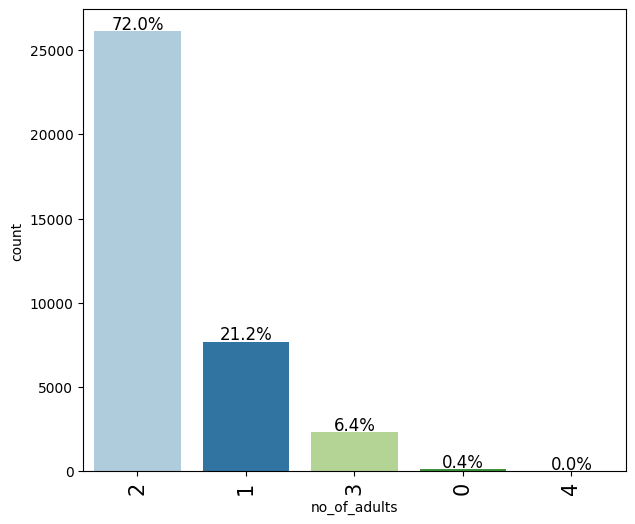

Visualizing: no_of_children


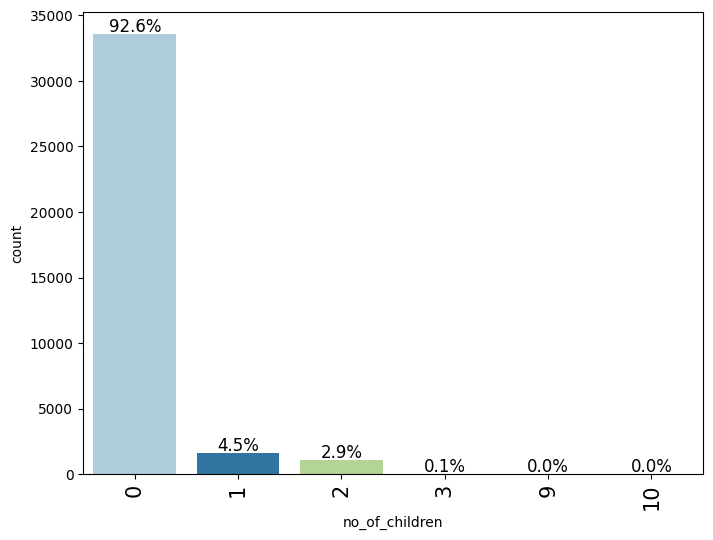

Visualizing: no_of_weekend_nights


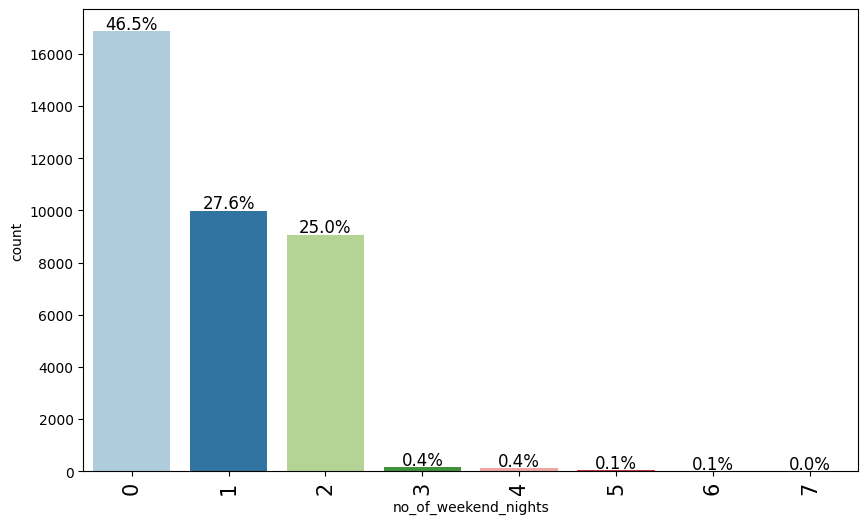

Visualizing: no_of_week_nights


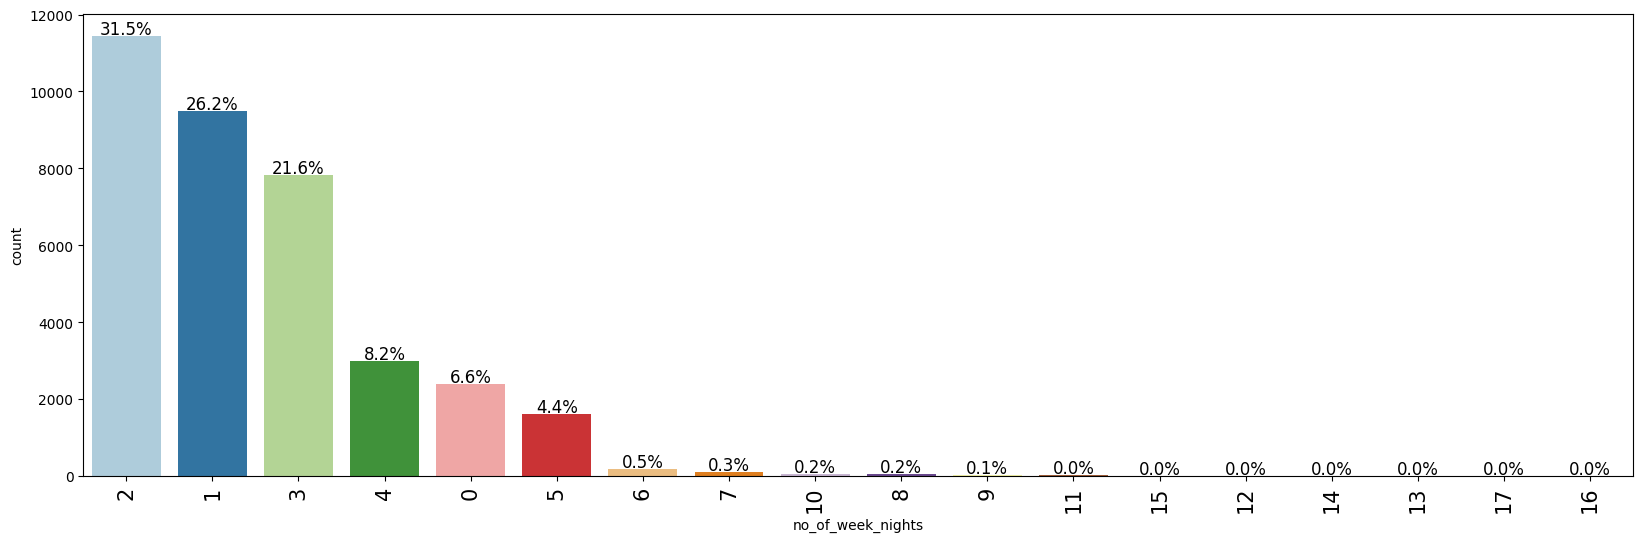

Visualizing: type_of_meal_plan


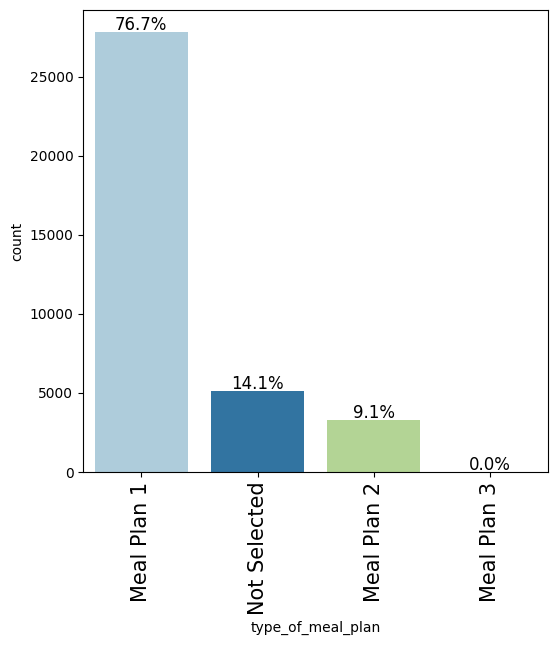

Visualizing: required_car_parking_space


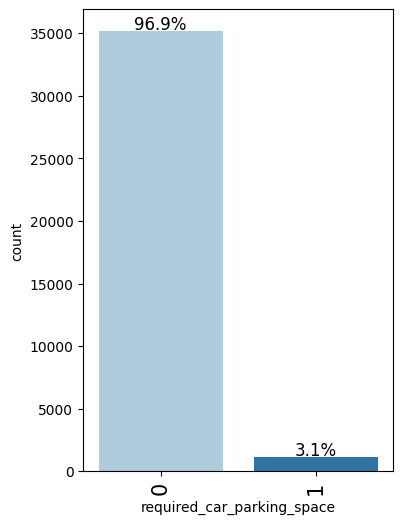

Visualizing: room_type_reserved


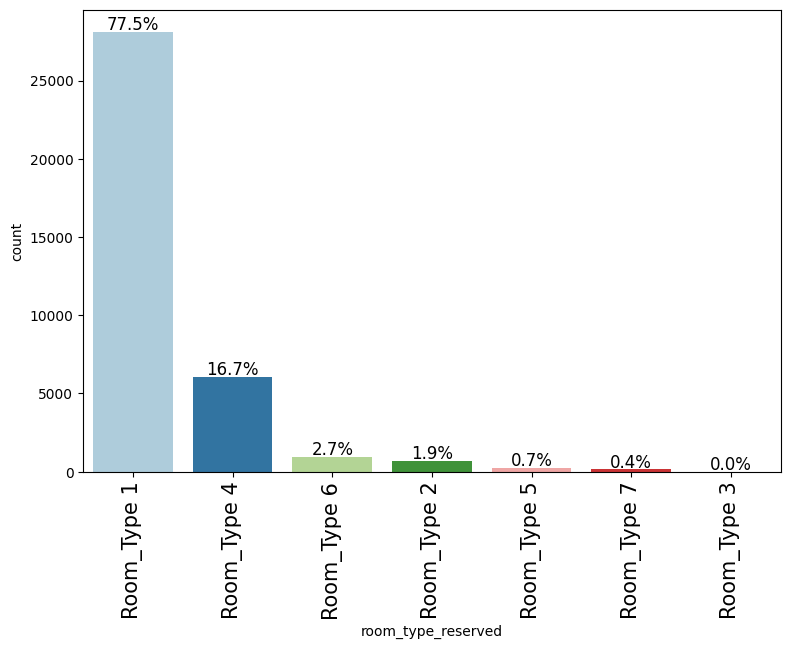

Visualizing: lead_time


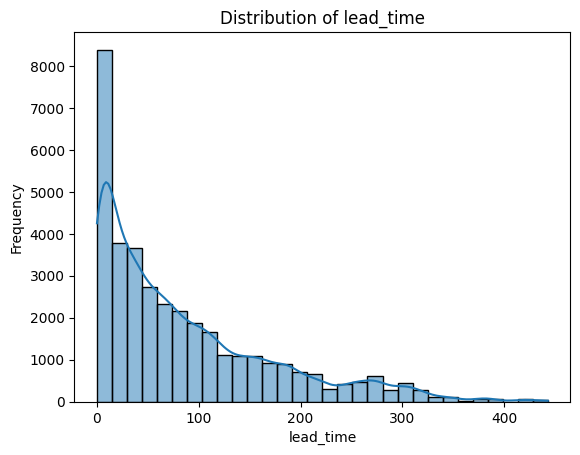

Visualizing: arrival_month


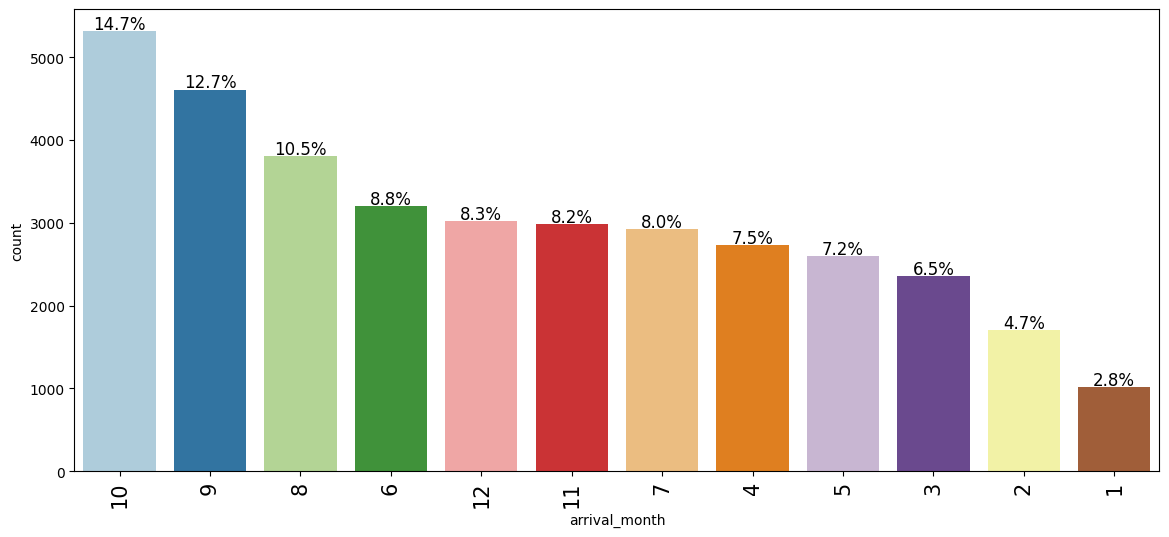

Visualizing: arrival_date


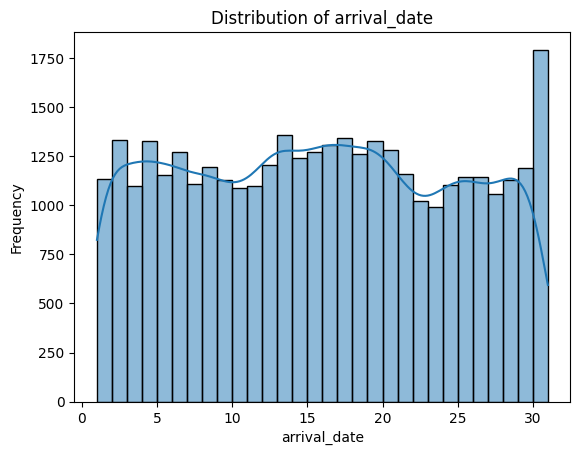

Visualizing: market_segment_type


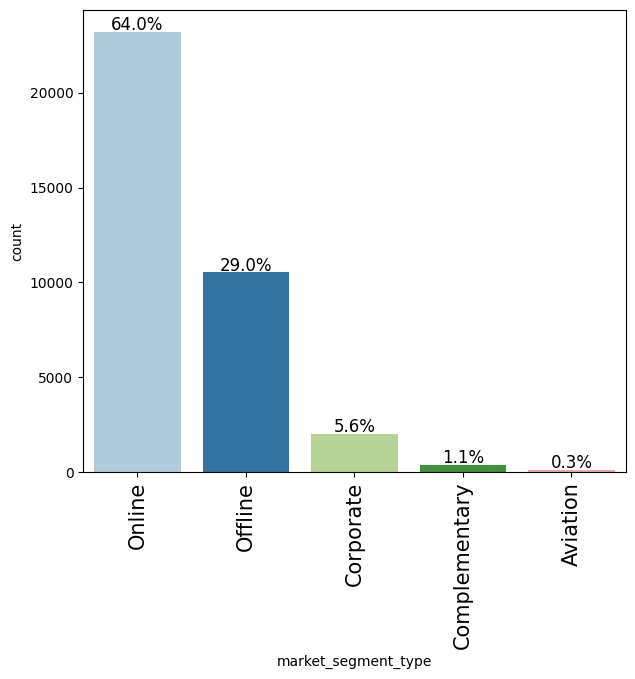

Visualizing: repeated_guest


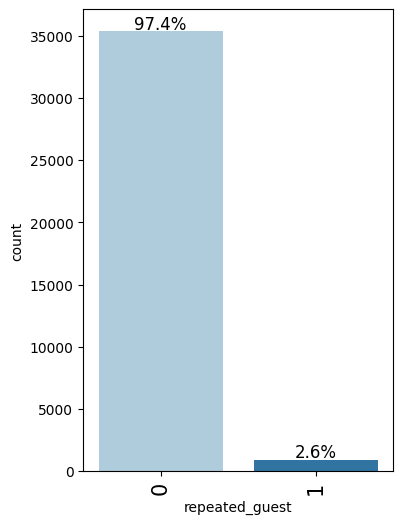

Visualizing: no_of_previous_cancellations


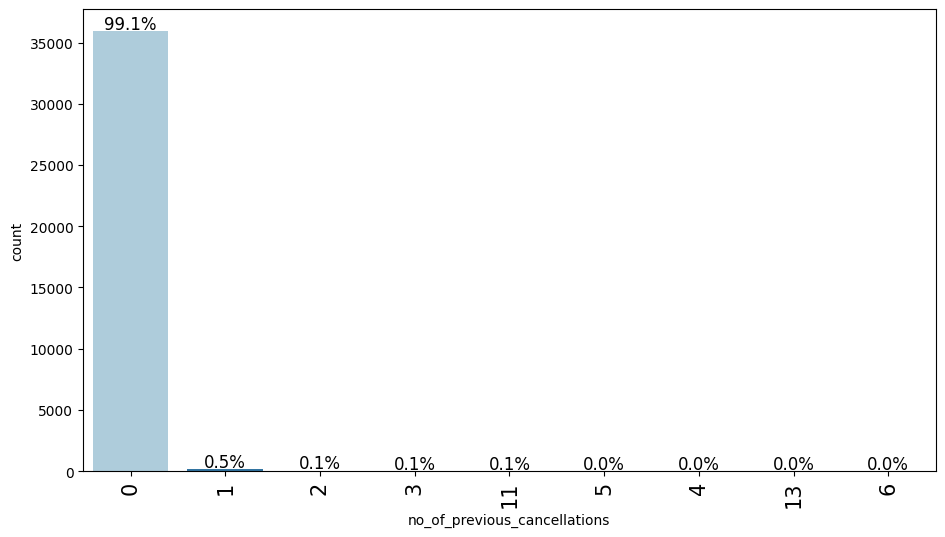

Visualizing: no_of_previous_bookings_not_canceled


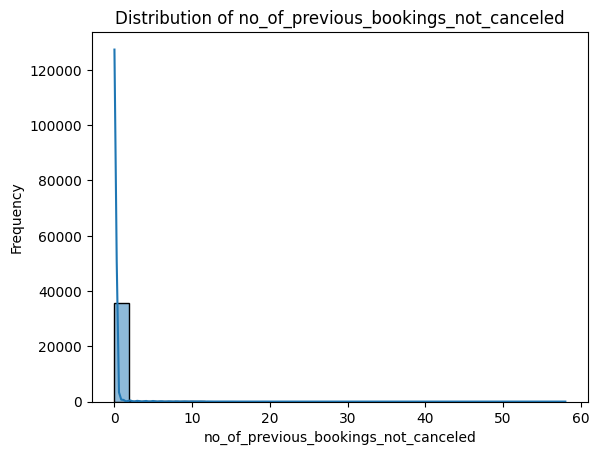

Visualizing: avg_price_per_room


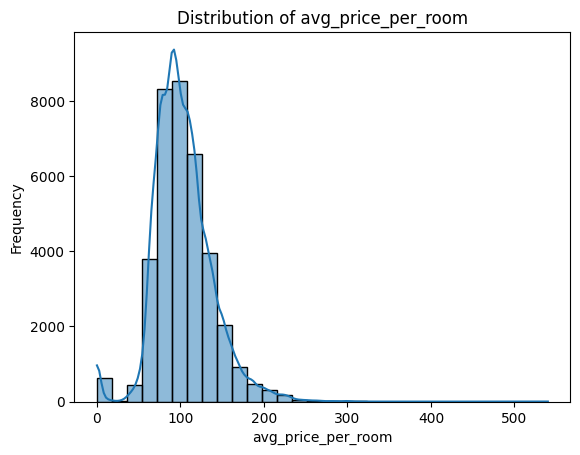

Visualizing: no_of_special_requests


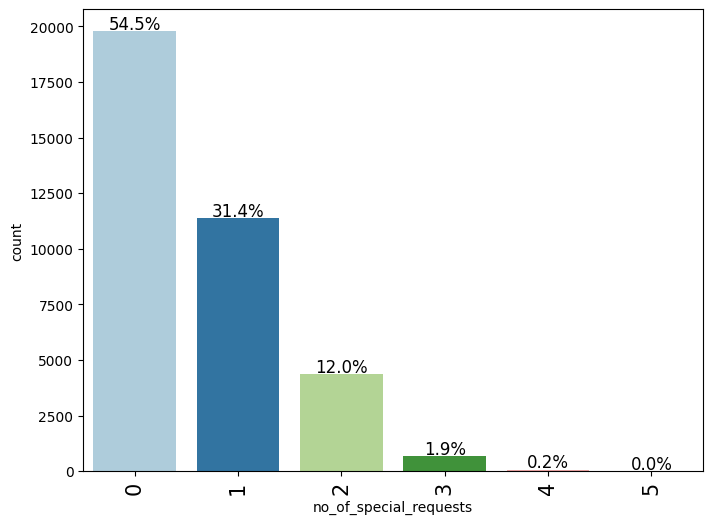

Visualizing: booking_status


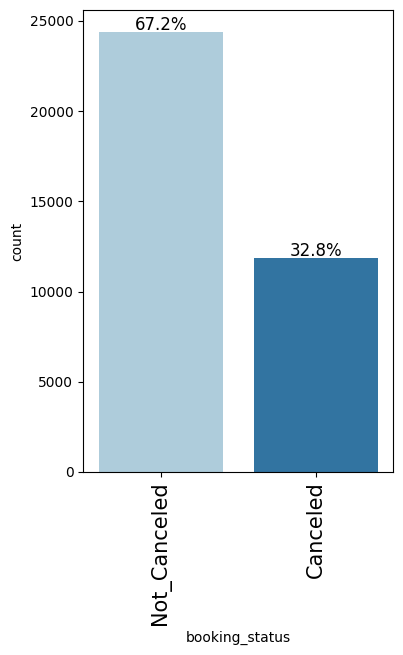

In [166]:
for col in da.columns:
    if da[col].dtype == 'object' or da[col].nunique() < 20:
        print(f"Visualizing: {col}")
        labeled_barplot(da, col, perc=True)
    else:
        print(f"Visualizing: {col}")
        sns.histplot(da[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

In [167]:
#bivariate Analysis

In [168]:
da['booking_status'] = da['booking_status'].map({"Not_Canceled": 1, "Canceled": 0})



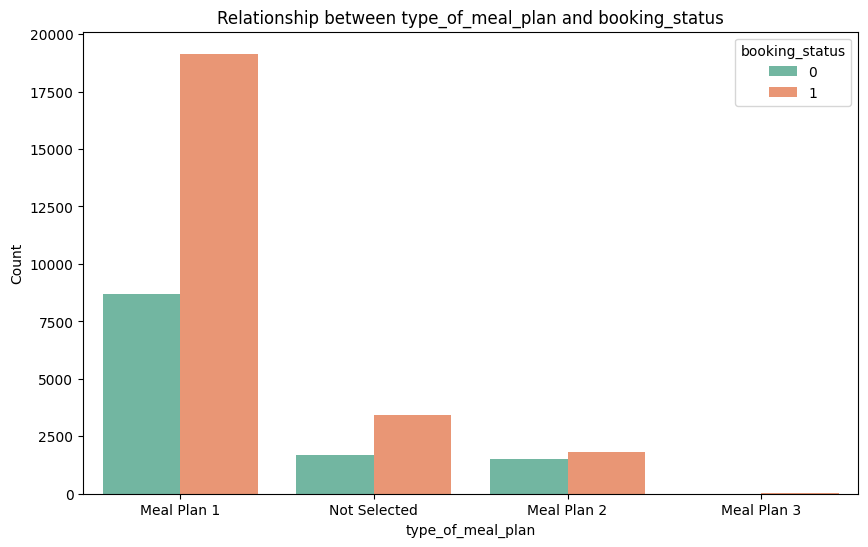

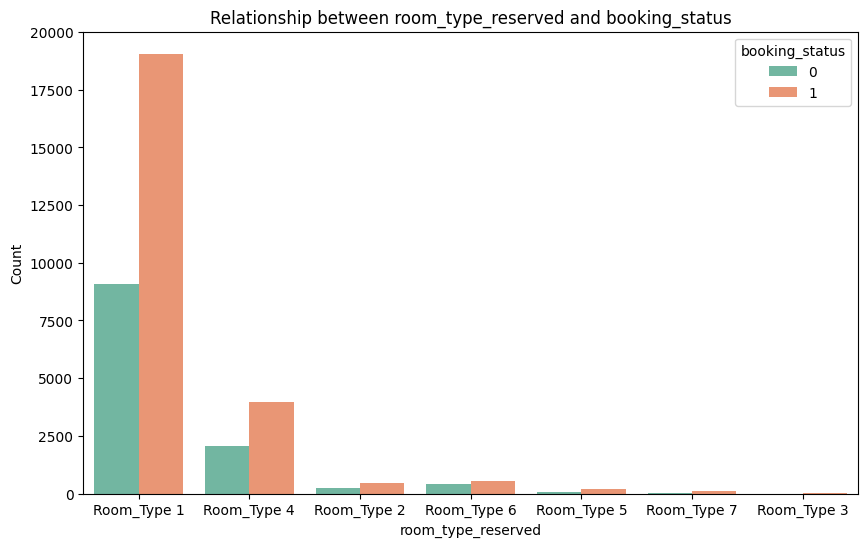

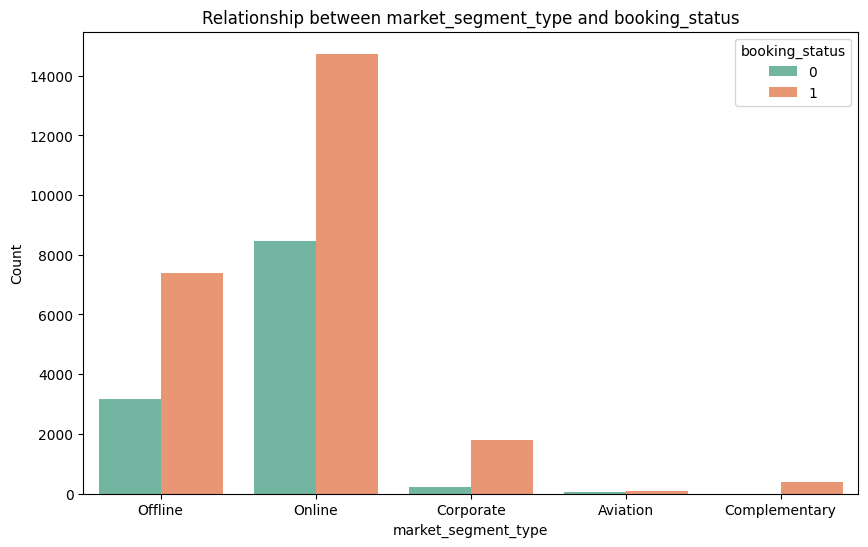

In [169]:
for col in da.columns:
    if da[col].dtype == 'object' and col != 'booking_status':  # Skip booking_status
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, hue='booking_status', data=da, palette='Set2')
        plt.title(f'Relationship between {col} and booking_status')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

<Axes: xlabel='no_of_adults', ylabel='count'>

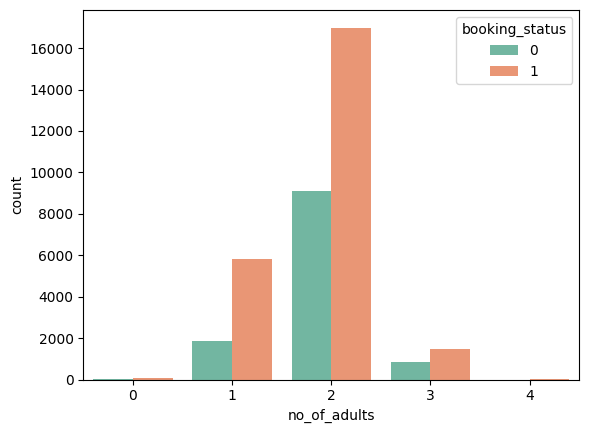

In [170]:
sns.countplot(x='no_of_adults', hue='booking_status', data=da, palette='Set2')

<Axes: xlabel='no_of_children', ylabel='count'>

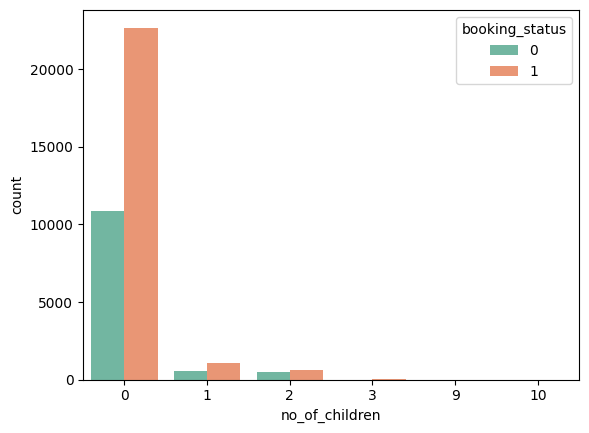

In [171]:
sns.countplot(x='no_of_children', hue='booking_status', data=da, palette='Set2')

<Axes: xlabel='no_of_weekend_nights', ylabel='count'>

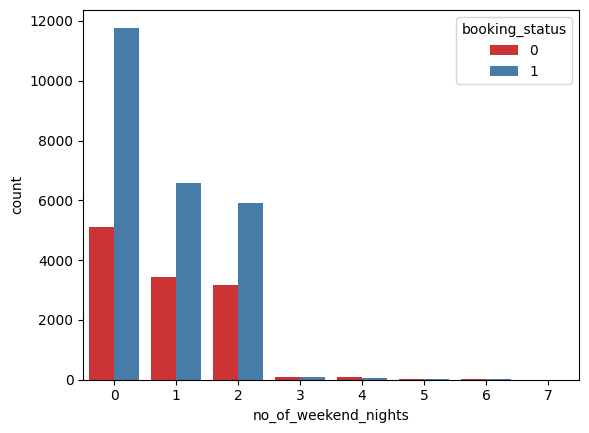

In [172]:
sns.countplot(x='no_of_weekend_nights', hue='booking_status', data=da, palette='Set1')

<Axes: xlabel='no_of_week_nights', ylabel='count'>

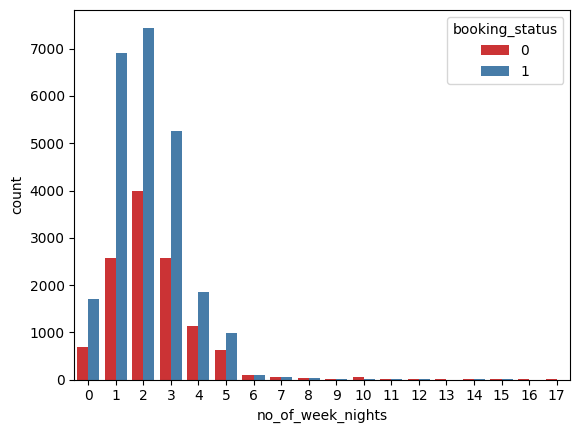

In [173]:
sns.countplot(x='no_of_week_nights', hue='booking_status', data=da, palette='Set1')

<Axes: xlabel='required_car_parking_space', ylabel='count'>

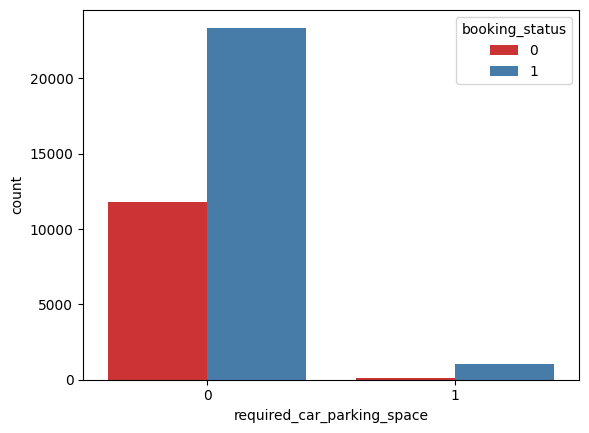

In [174]:
sns.countplot(x='required_car_parking_space', hue='booking_status', data=da, palette='Set1')

<Axes: xlabel='booking_status', ylabel='lead_time'>

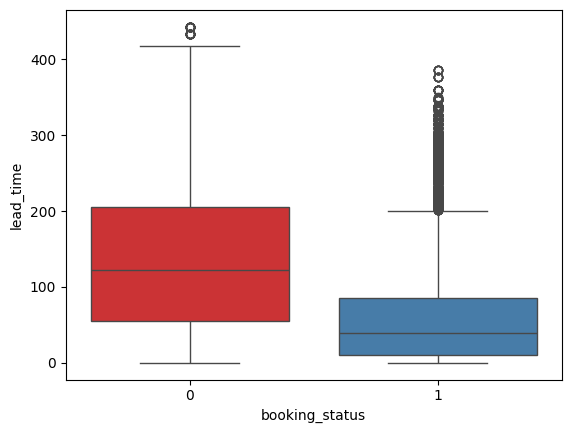

In [175]:
sns.boxplot(x='booking_status', y='lead_time', data=da, palette='Set1')

<Axes: xlabel='arrival_month', ylabel='count'>

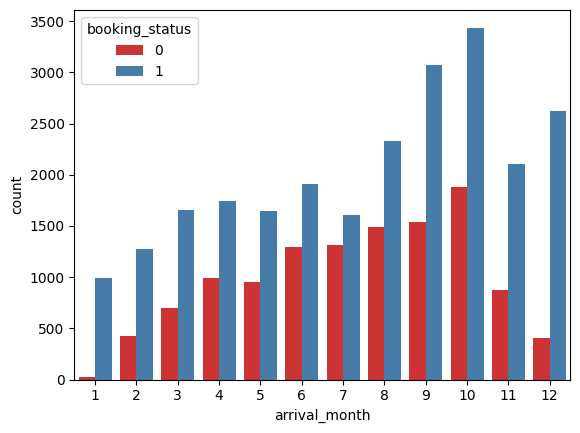

In [176]:
sns.countplot(x='arrival_month', hue='booking_status', data=da, palette='Set1')

<Axes: xlabel='repeated_guest', ylabel='count'>

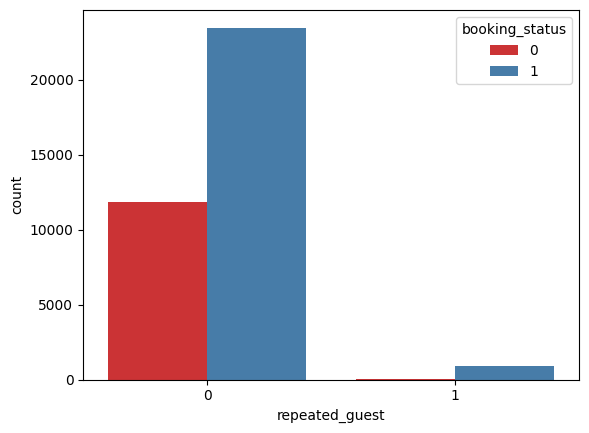

In [177]:
sns.countplot(x='repeated_guest', hue='booking_status', data=da, palette='Set1')

<Axes: xlabel='booking_status', ylabel='avg_price_per_room'>

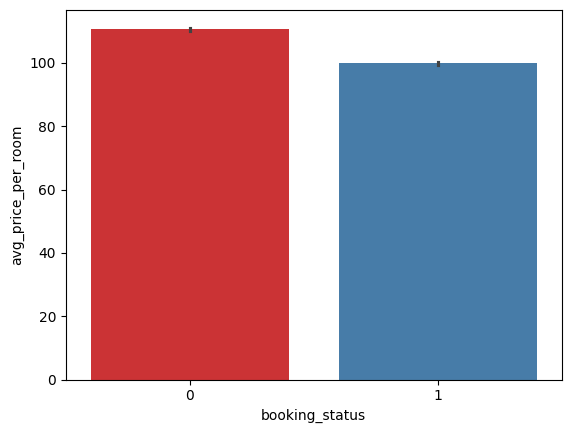

In [178]:
sns.barplot(y='avg_price_per_room', x='booking_status', data=da, palette='Set1')

<Axes: xlabel='no_of_special_requests', ylabel='count'>

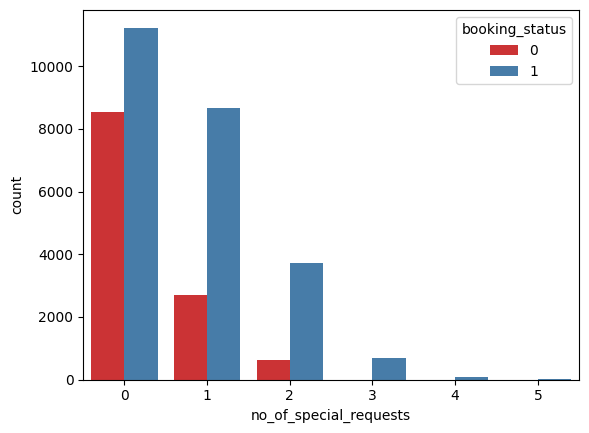

In [179]:
sns.countplot(x='no_of_special_requests', hue='booking_status', data=da, palette='Set1')

In [180]:
da.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,10,2,Offline,0,0,0,65.00,0,1
1,2,0,2,3,Not Selected,0,Room_Type 1,5,11,6,Online,0,0,0,106.68,1,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2,28,Online,0,0,0,60.00,0,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,5,20,Online,0,0,0,100.00,0,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,4,11,Online,0,0,0,94.50,0,0


<Axes: xlabel='avg_price_per_room', ylabel='market_segment_type'>

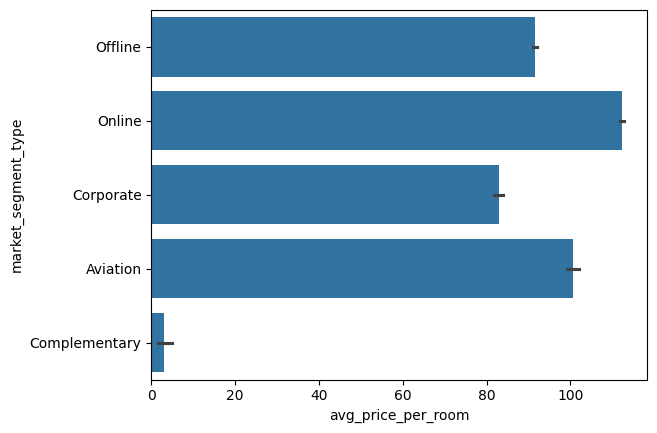

In [181]:
sns.barplot(x="avg_price_per_room", y="market_segment_type", data=da)

<Axes: xlabel='repeated_guest', ylabel='no_of_previous_cancellations'>

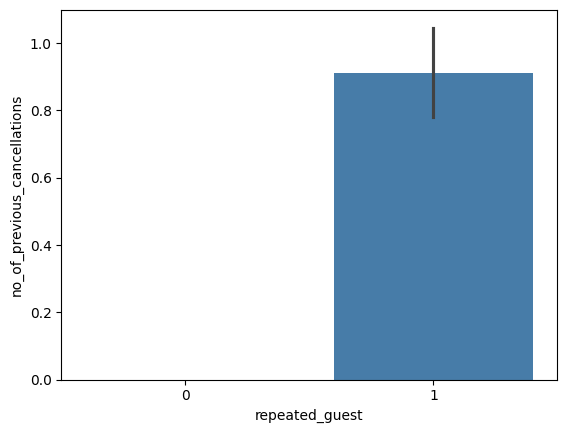

In [182]:
sns.barplot(x='repeated_guest', y='no_of_previous_cancellations', data=da, palette='Set1')

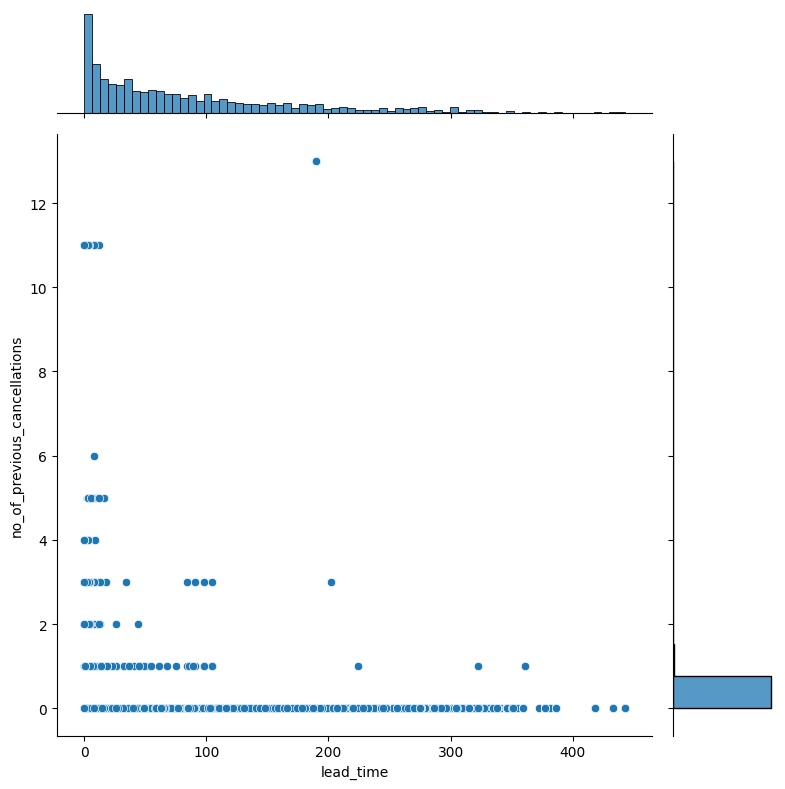

In [183]:
sns.jointplot(x='lead_time', y='no_of_previous_cancellations', data=da, kind='scatter', height=8)

<Axes: xlabel='required_car_parking_space', ylabel='room_type_reserved'>

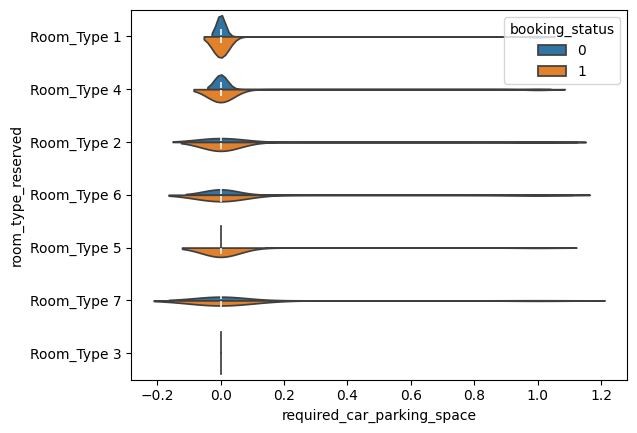

In [184]:
sns.violinplot(x="required_car_parking_space", y="room_type_reserved", hue="booking_status", data=da, split=True)

In [185]:
da.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,10,2,Offline,0,0,0,65.00,0,1
1,2,0,2,3,Not Selected,0,Room_Type 1,5,11,6,Online,0,0,0,106.68,1,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2,28,Online,0,0,0,60.00,0,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,5,20,Online,0,0,0,100.00,0,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,4,11,Online,0,0,0,94.50,0,0


In [186]:
print(da.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_month                         36275 non-null  int64  
 9   arrival_date                          36275 non-null  int64  
 10  market_segment_type                   36275 non-null  object 
 11  repeated_guest 

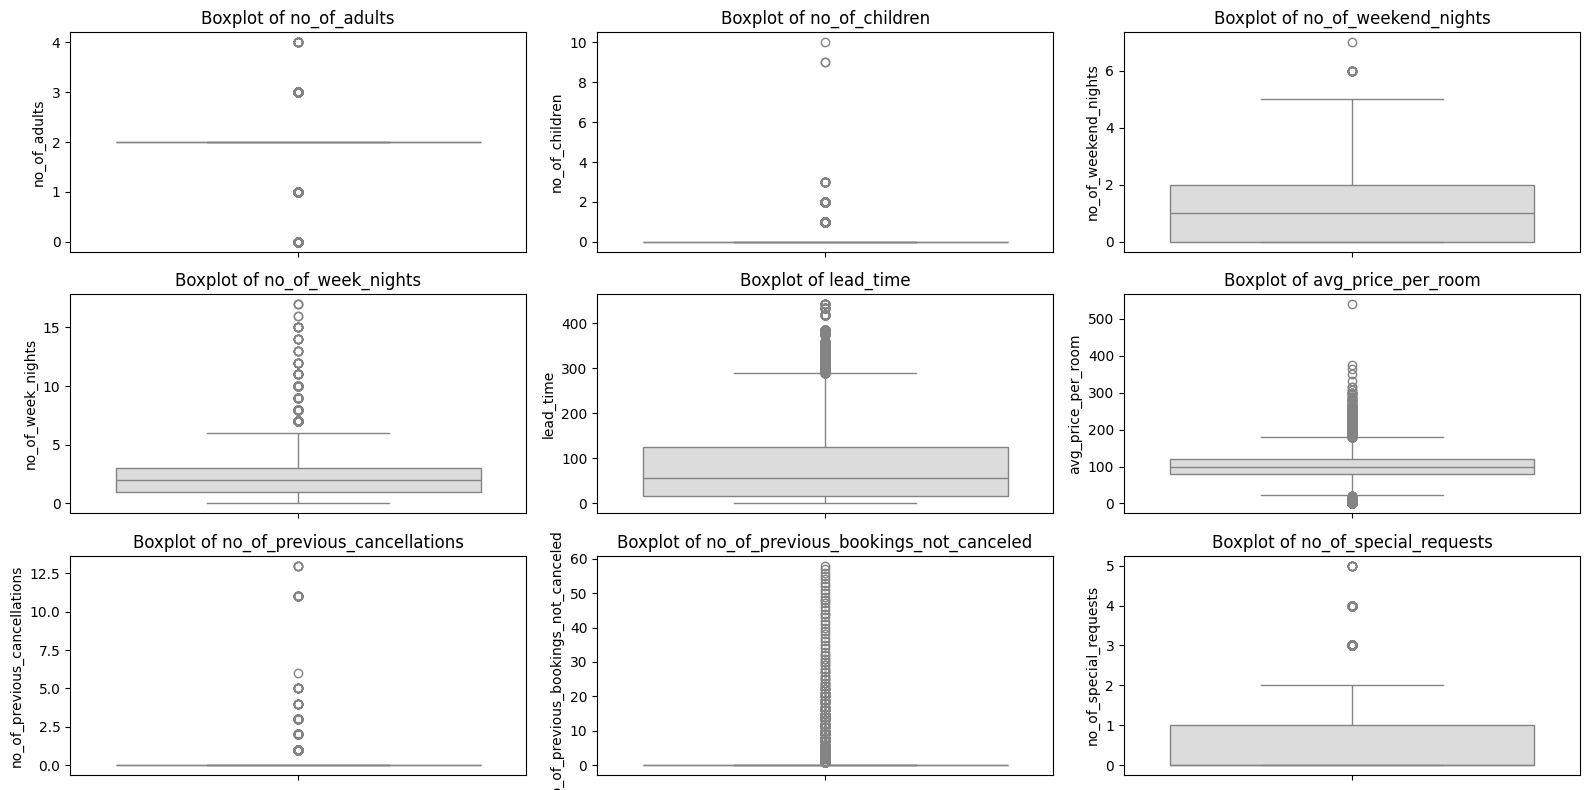

In [187]:
numerical_columns = [
    'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
    'lead_time', 'avg_price_per_room', 'no_of_previous_cancellations',
    'no_of_previous_bookings_not_canceled', 'no_of_special_requests'
]

# Setting up the plot grid
plt.figure(figsize=(16, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Adjust grid size based on the number of variables (3x3 grid here)
    sns.boxplot(data=da, y=col, palette="coolwarm")
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()

# Show the consolidated plot
plt.show()

In [188]:
numerical_columns = da.select_dtypes(include=np.number).columns


def detect_outliers(data, column, threshold=1.5):
    Q1 = data[column].quantile(0.25)  # First Quartile
    Q3 = data[column].quantile(0.75)  # Third Quartile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]


def treat_outliers(data, column, threshold=1.5, method="capping"):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    if method == "capping":

        data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
        data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    elif method == "removal":

        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data


for col in numerical_columns:
    print(f"Analyzing {col}...")


    outliers = detect_outliers(da, col)
    print(f"Number of outliers in {col}: {len(outliers)}")



    da = treat_outliers(da, col, method="capping")


for col in numerical_columns:
    print(f"Post-treatment outliers in {col}: {len(detect_outliers(da, col))}")

Analyzing no_of_adults...
Number of outliers in no_of_adults: 10167
Analyzing no_of_children...
Number of outliers in no_of_children: 2698
Analyzing no_of_weekend_nights...
Number of outliers in no_of_weekend_nights: 21
Analyzing no_of_week_nights...
Number of outliers in no_of_week_nights: 324
Analyzing required_car_parking_space...
Number of outliers in required_car_parking_space: 1124
Analyzing lead_time...
Number of outliers in lead_time: 1331
Analyzing arrival_month...
Number of outliers in arrival_month: 0
Analyzing arrival_date...
Number of outliers in arrival_date: 0
Analyzing repeated_guest...
Number of outliers in repeated_guest: 930
Analyzing no_of_previous_cancellations...
Number of outliers in no_of_previous_cancellations: 338
Analyzing no_of_previous_bookings_not_canceled...
Number of outliers in no_of_previous_bookings_not_canceled: 812
Analyzing avg_price_per_room...
Number of outliers in avg_price_per_room: 1696
Analyzing no_of_special_requests...
Number of outliers in

In [189]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  float64
 1   no_of_children                        36275 non-null  float64
 2   no_of_weekend_nights                  36275 non-null  float64
 3   no_of_week_nights                     36275 non-null  float64
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  float64
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  float64
 8   arrival_month                         36275 non-null  float64
 9   arrival_date                          36275 non-null  float64
 10  market_segment_type                   36275 non-null  object 
 11  repeated_guest 

In [190]:
da["total_guests"] = da["no_of_adults"] + da["no_of_children"]

In [191]:
X = da.drop("booking_status", axis=1)
Y = da["booking_status"]

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

X = X.astype(float)

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)




In [192]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
booking_status
1.0    0.670644
0.0    0.329356
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
1.0    0.676376
0.0    0.323624
Name: proportion, dtype: float64


In [193]:
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [194]:
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [195]:
# Prepare the feature set and the target variable
X = da.drop("booking_status", axis=1)
Y = da["booking_status"]

# Create dummy variables
X = pd.get_dummies(X, drop_first=True)

# Convert to float
X = X.astype(float)

# Check for zero variance columns
zero_variance_cols = X.columns[X.nunique() <= 1]
X.drop(columns=zero_variance_cols, inplace=True)

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Add constant to the training data
X_train = sm.add_constant(X_train)

# Fit the logistic regression model
logit = sm.Logit(y_train, X_train)
lg = logit.fit(disp=False)

# Print the summary of the logistic model
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25371
Method:                           MLE   Df Model:                           20
Date:                Sun, 24 Nov 2024   Pseudo R-squ.:                  0.3188
Time:                        18:20:48   Log-Likelihood:                -10962.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 2.6870      0.255     10.548      0.000       2.188       3.186
no_of_weekend_nights                 -0.1181      0.019     -6

In [196]:
X_test = sm.add_constant(X_test)

# Predict probabilities on the test set
y_pred_prob = lg.predict(X_test)

# Convert probabilities to binary predictions (threshold = 0.5)
y_pred = (y_pred_prob >= 0.5).astype(int)

In [197]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8026279518515115
Precision: 0.8323345658549025
Recall: 0.8868360277136259
F1-Score: 0.8587213891081295
Confusion Matrix:
 [[2207 1315]
 [ 833 6528]]


In [198]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model (start with k=5 as a default)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [199]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculate evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Print results
print("KNN Model Performance:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-Score:", f1_knn)

# Confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", conf_matrix_knn)

KNN Model Performance:
Accuracy: 0.804281907562253
Precision: 0.8334820859365039
Recall: 0.8880586876783045
F1-Score: 0.8599052880820837
Confusion Matrix:
 [[2216 1306]
 [ 824 6537]]


In [200]:
from sklearn.naive_bayes import GaussianNB

In [201]:
nb_model = GaussianNB()

In [202]:
nb_model.fit(X_train, y_train)

GaussianNB()

In [203]:
y_pred_nb = nb_model.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

# Print results
print("Naive Bayes Model Performance:")
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1-Score:", f1_nb)

# Confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:\n", conf_matrix_nb)

Naive Bayes Model Performance:
Accuracy: 0.39823578057520903
Precision: 0.9168377823408624
Recall: 0.12131503871756555
F1-Score: 0.2142771445710858
Confusion Matrix:
 [[3441   81]
 [6468  893]]


In [204]:
from sklearn.tree import DecisionTreeClassifier

In [205]:
dt_model = DecisionTreeClassifier(random_state=1)

# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [206]:
y_pred_dt = dt_model.predict(X_test)

In [207]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Print the results
print("Decision Tree Model Performance:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-Score:", f1_dt)

# Confusion matrix for the Decision Tree model
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", conf_matrix_dt)

Decision Tree Model Performance:
Accuracy: 0.865753928144813
Precision: 0.906000550509221
Recall: 0.8943078386088846
F1-Score: 0.9001162234224379
Confusion Matrix:
 [[2839  683]
 [ 778 6583]]


In [208]:
#

In [209]:
correlation_matrix = X_train.corr()
print(correlation_matrix)

# Calculate VIF for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature in the dataset
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data)

                                   const  no_of_weekend_nights  \
const                                NaN                   NaN   
no_of_weekend_nights                 NaN              1.000000   
no_of_week_nights                    NaN              0.125012   
lead_time                            NaN              0.055680   
arrival_month                        NaN             -0.011842   
arrival_date                         NaN              0.029631   
avg_price_per_room                   NaN             -0.000905   
no_of_special_requests               NaN              0.055796   
type_of_meal_plan_Meal Plan 2        NaN             -0.043732   
type_of_meal_plan_Meal Plan 3        NaN             -0.009943   
type_of_meal_plan_Not Selected       NaN             -0.018830   
room_type_reserved_Room_Type 2       NaN              0.021409   
room_type_reserved_Room_Type 3       NaN             -0.005595   
room_type_reserved_Room_Type 4       NaN              0.064927   
room_type_

In [210]:
X_train.drop(columns=["market_segment_type_Offline"], inplace=True)
X_test.drop(columns=["market_segment_type_Offline"], inplace=True)

In [211]:
vif_data_updated = pd.DataFrame()
vif_data_updated["feature"] = X_train.columns
vif_data_updated["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(vif_data_updated)

                              feature        VIF
0                               const  30.738115
1                no_of_weekend_nights   1.047355
2                   no_of_week_nights   1.088515
3                           lead_time   1.223441
4                       arrival_month   1.048963
5                        arrival_date   1.005718
6                  avg_price_per_room   1.756545
7              no_of_special_requests   1.224265
8       type_of_meal_plan_Meal Plan 2   1.195700
9       type_of_meal_plan_Meal Plan 3   1.024310
10     type_of_meal_plan_Not Selected   1.231652
11     room_type_reserved_Room_Type 2   1.031858
12     room_type_reserved_Room_Type 3   1.003070
13     room_type_reserved_Room_Type 4   1.291909
14     room_type_reserved_Room_Type 5   1.027248
15     room_type_reserved_Room_Type 6   1.220486
16     room_type_reserved_Room_Type 7   1.064048
17  market_segment_type_Complementary   1.221595
18      market_segment_type_Corporate   1.252658
19         market_se

In [212]:
logit = sm.Logit(y_train, X_train)
lg_model_updated = logit.fit(disp=False)

# Print the summary
print(lg_model_updated.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Sun, 24 Nov 2024   Pseudo R-squ.:                  0.3171
Time:                        18:20:54   Log-Likelihood:                -10989.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 4.7160      0.104     45.226      0.000       4.512       4.920
no_of_weekend_nights                 -0.1230      0.020     -6

In [213]:
insignificant_features = [
    "type_of_meal_plan_Meal Plan 3",
    "market_segment_type_Complementary",
    "room_type_reserved_Room_Type 3",
    "arrival_date"
]
X_train = X_train.drop(columns=insignificant_features)
X_test = X_test.drop(columns=insignificant_features)

# Refit the logistic regression model
logit = sm.Logit(y_train, X_train)
lg_model_updated = logit.fit(disp=False)

# Print updated summary
print(lg_model_updated.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25376
Method:                           MLE   Df Model:                           15
Date:                Sun, 24 Nov 2024   Pseudo R-squ.:                  0.3168
Time:                        18:20:54   Log-Likelihood:                -10994.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              4.7098      0.100     47.260      0.000       4.514       4.905
no_of_weekend_nights              -0.1233      0.020     -6.318      0.

In [214]:
X_test = sm.add_constant(X_test)

# Make predictions
y_pred = lg_model_updated.predict(X_test)
y_pred_class = (y_pred >= 0.5).astype(int)

# Evaluate performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

print("Updated Logistic Regression Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:\n", conf_matrix)

Updated Logistic Regression Performance:
Accuracy: 0.8014334282826426
Precision: 0.8316326530612245
Recall: 0.8857492188561337
F1-Score: 0.8578383001118347
Confusion Matrix:
 [[2202 1320]
 [ 841 6520]]


In [215]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

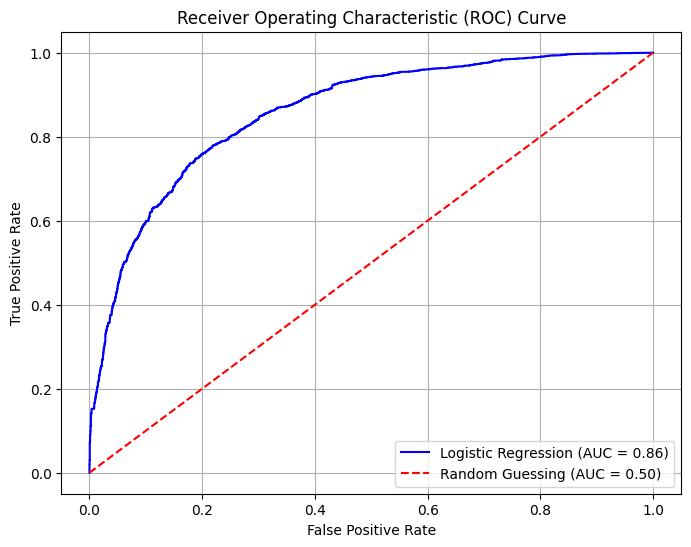

AUC Score: 0.8589


In [216]:
y_pred_probs = lg_model_updated.predict(sm.add_constant(X_test))

# Compute False Positive Rate (FPR), True Positive Rate (TPR), and Thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_probs)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc_score:.2f})", color="blue")
plt.plot([0, 1], [0, 1], "r--", label="Random Guessing (AUC = 0.50)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

print(f"AUC Score: {auc_score:.4f}")

In [217]:
optimal_idx = ((1 - tpr)**2 + fpr**2).argmin()
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.4f}")

Optimal Threshold: 0.6813


In [218]:
y_pred_class_new = (y_pred_probs >= optimal_threshold).astype(int)

# Evaluate performance metrics
accuracy_new = accuracy_score(y_test, y_pred_class_new)
precision_new = precision_score(y_test, y_pred_class_new)
recall_new = recall_score(y_test, y_pred_class_new)
f1_new = f1_score(y_test, y_pred_class_new)

print("\nModel Performance with Optimal Threshold:")
print(f"Accuracy: {accuracy_new:.4f}")
print(f"Precision: {precision_new:.4f}")
print(f"Recall: {recall_new:.4f}")
print(f"F1-Score: {f1_new:.4f}")


Model Performance with Optimal Threshold:
Accuracy: 0.7796
Precision: 0.8815
Recall: 0.7788
F1-Score: 0.8270


In [219]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data (using the same scaler from the training data)
X_test_scaled = scaler.transform(X_test)

In [220]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# List of potential k values (from 1 to 20)
k_values = list(range(1, 21))

# Store cross-validation scores
cv_scores = []

# Loop over each value of k
for k in k_values:
    # Create the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Perform cross-validation and compute the mean accuracy
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')

    # Store the mean score
    cv_scores.append(np.mean(scores))

# Find the best k (the k with the highest score)
best_k = k_values[np.argmax(cv_scores)]
print(f"The optimal value of k is: {best_k}")

The optimal value of k is: 9


In [221]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train the KNN classifier with the optimal k value
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = knn_final.predict(X_test_scaled)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

# Print performance metrics
print("KNN Classifier Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", conf_matrix)

KNN Classifier Performance:
Accuracy: 0.8531654874575025
Precision: 0.8765190121520973
Recall: 0.9112892270072
F1-Score: 0.8935660050619422
Confusion Matrix:
 [[2577  945]
 [ 653 6708]]


In [222]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("Decision Tree Classifier (Default Hyperparameters) Performance:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-Score:", f1_dt)

# Confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", conf_matrix_dt)

Decision Tree Classifier (Default Hyperparameters) Performance:
Accuracy: 0.8655701552880639
Precision: 0.9048599670510709
Recall: 0.8953946474663769
F1-Score: 0.900102424035507
Confusion Matrix:
 [[2829  693]
 [ 770 6591]]


In [223]:
dt_classifier_pruned = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the pruned model
dt_classifier_pruned.fit(X_train, y_train)

# Make predictions
y_pred_pruned_dt = dt_classifier_pruned.predict(X_test)

# Evaluate performance
accuracy_pruned_dt = accuracy_score(y_test, y_pred_pruned_dt)
precision_pruned_dt = precision_score(y_test, y_pred_pruned_dt)
recall_pruned_dt = recall_score(y_test, y_pred_pruned_dt)
f1_pruned_dt = f1_score(y_test, y_pred_pruned_dt)

print("Decision Tree Classifier (Pre-pruned) Performance:")
print("Accuracy:", accuracy_pruned_dt)
print("Precision:", precision_pruned_dt)
print("Recall:", recall_pruned_dt)
print("F1-Score:", f1_pruned_dt)

# Confusion matrix
conf_matrix_pruned_dt = confusion_matrix(y_test, y_pred_pruned_dt)
print("Confusion Matrix (Pre-pruned):\n", conf_matrix_pruned_dt)

Decision Tree Classifier (Pre-pruned) Performance:
Accuracy: 0.8306533125057429
Precision: 0.8528132992327365
Recall: 0.9059910338269257
F1-Score: 0.8785982478097623
Confusion Matrix (Pre-pruned):
 [[2371 1151]
 [ 692 6669]]
